## Mini Project III

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import RobustScaler

# from sklearn.cluster import KMeans
# from sklearn.cluster import AgglomerativeClustering
# import scipy.cluster.hierarchy as sch
# from sklearn.cluster import DBSCAN

from sklearn.decomposition import PCA

# from scipy.optimize import minimize_scalar
# from scipy.optimize import minimize, LinearConstraint

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_regression, SelectKBest


from datetime import datetime


In [133]:
# import plotly.express as px
import plotly.graph_objects as go
import plotly 

# For interactive widgets:

from ipywidgets.widgets import interact, interact_manual
import ipywidgets as widgets

In [134]:
dfaccounts = pd.read_csv('twm_accounts.csv',sep=';')
print(dfaccounts['acct_type'].value_counts())
dfaccounts.head(3)

CK      520
CC      468
SV      421
Name: acct_type, dtype: int64


,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00


In [135]:
dfchecking_acct = pd.read_csv('twm_checking_acct.csv',sep=';')
dfchecking_acct.head(3)

,cust_id,acct_nbr,minimum_balance,per_check_fee,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1362548,13625482,3000,0.0,Y,11.11.1986,NaN,6004.34,569.65
1,1362487,13624872,3000,0.0,Y,12.1.1995,NaN,2781.07,1401.21
2,1363017,13630172,3000,0.0,Y,19.3.1994,NaN,2694.91,147.15


In [136]:
dfcredit_acct = pd.read_csv('twm_credit_acct.csv',sep=';')
dfcredit_acct.head(3)

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68


In [137]:
dfchecking_tran = pd.read_csv('twm_checking_tran.csv',sep=',')
dfchecking_tran.head(3)

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1362480,1,-297.38,-297.38,0.0,34.47,2.1.1995,,P,WD
1,1362484,1,-172.76,-172.76,0.0,2440.70,2.1.1995,,P,WD
2,1362485,1,-26.79,-26.79,0.0,182.99,26.9.1995,,P,WD


In [138]:
dfcustomer = pd.read_csv('twm_customer.csv',sep=';')
dfcustomer.head(3)

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA


In [139]:
def explore(df,id=0):
    """
    Explore dataframe data.
    Parameters:
    df: Dataframe.
    id: Column number or name with the primary IDs. Default is zero.
    """
    if type(id)==int:
        print(f'Unique IDs: {len(set(df.iloc[:,0]))}. # of rows: {df.shape[0]}. Match: {len(set(df.iloc[:,0]))==df.shape[0]}')
    else:
        print(f'Unique IDs: {len(set(df[id]))}. # of rows: {df.shape[0]}. Match: {len(set(df.iloc[:,0]))==df.shape[0]}')
    
    if len(set(df.iloc[:,0])) !=df.shape[0]:
        for column in df.columns:
            print(column, len(df[column].value_counts()))
    
    # count amount of missing values in each column
    total = df.isnull().sum().sort_values(ascending=False) 
    # % of rows with missing data from each column
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) 

    # create a table that lists total and % of missing values starting with the highest
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 

    # extract the names of columns with missing values
    cols_with_missing = missing_data[missing_data.Percent > 0].index.tolist()
    print(df.dtypes[cols_with_missing])

    print(f'')
    return missing_data

explore(dfcustomer)

Unique IDs: 747. # of rows: 747. Match: True
Series([], dtype: object)



,Total,Percent
cust_id,0,0.0
income,0,0.0
age,0,0.0
years_with_bank,0,0.0
nbr_children,0,0.0
gender,0,0.0
marital_status,0,0.0
name_prefix,0,0.0
first_name,0,0.0
last_name,0,0.0


In [140]:
dfsavings_tran = pd.read_csv('twm_savings_tran.csv',sep=';')
dfsavings_tran.head(3)

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,136.03,136.03,0.00,1521.57,26.10.1995,84111,A,DP
1,1362746,1,2.83,0.00,2.83,2265.90,31.1.1995,235959,,IN
2,1363251,11,13.56,0.00,13.56,5438.90,30.4.1995,235959,,IN


In [141]:
# Unable to find unique ID column for dfsavings_tran data
explore(dfsavings_tran,'tran_id')
dfsavings_tran.describe()

Unique IDs: 62. # of rows: 11189. Match: False
cust_id 420
tran_id 62
tran_amt 4648
principal_amt 3971
interest_amt 686
new_balance 10012
tran_date 365
tran_time 5832
channel 9
tran_code 6
Series([], dtype: object)



,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance
count,1.118900e+04,11189.000000,11189.000000,11189.000000,11189.000000,11189.000000
mean,1.362988e+06,16.113504,14.458362,13.628621,0.829741,1229.467968
std,2.979129e+02,11.024730,221.971173,222.003741,2.856393,2256.670395
min,1.362480e+06,1.000000,-2495.880000,-2495.880000,0.000000,0.070000
25%,1.362720e+06,7.000000,-0.750000,-0.750000,0.000000,238.480000
50%,1.362978e+06,14.000000,0.390000,0.000000,0.000000,562.040000
75%,1.363262e+06,23.000000,7.340000,0.000000,0.480000,1247.300000
max,1.363495e+06,62.000000,4478.610000,4478.610000,44.680000,26016.690000


In [142]:
px.histogram(dfsavings_tran,x='tran_amt')

In [143]:
dftransactions = pd.read_csv('twm_transactions.csv',sep=';')
dftransactions.head(3)

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD


<AxesSubplot: xlabel='tran_date', ylabel='tran_amt'>

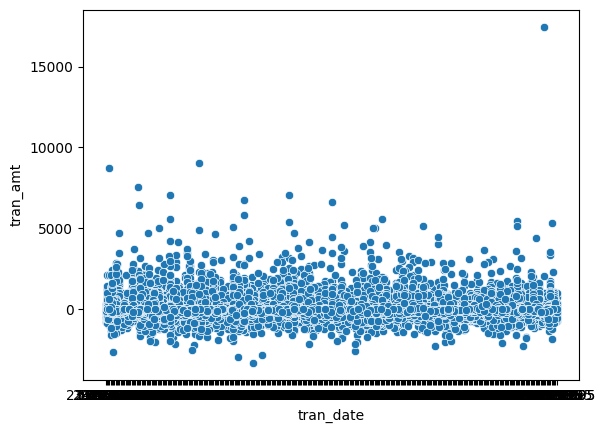

In [144]:
sns.scatterplot(data=dftransactions,x='tran_date',y='tran_amt')

In [145]:
# Convert tran_date to dates

# date = datetime.strptime(dftransactions['tran_date'][0],'%d.%m.%Y')
# date.strftime('%Y')

def date_columns(df,date_column='tran_date',format='%d.%m.%Y'):
    """
    Take the dates in a dateframes to create new columns:
        _date_standard: Datetime data 
        _year
        _month
    Parmaters:
    - df: Dataframe.
    - date_column: Name of the column containing the date strings.
    - Format: Original date format in the dateframe. Default: '%d.%m.%Y'
    
    Make sure to do the following import: 
    from datetime import datetime
    """
    date_column=str(date_column)
    
    # df[str(date_column+'_year')] = pd.to_datetime(df[date_column],
    #     format='%d.%m.%Y')
    date = pd.to_datetime(df[date_column],
        format='%d.%m.%Y')
    df[str(date_column+'_standard')] = date
    df[str(date_column+'_year')] = date.dt.year
    df[str(date_column+'_month')] = date.dt.month

date_columns(dftransactions)
dftransactions.head()


,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code,tran_date_standard,tran_date_year,tran_date_month
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ,1995-10-21,1995,10
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ,1995-02-05,1995,2
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD,1995-07-23,1995,7
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK,1995-01-30,1995,1
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ,1995-01-25,1995,1


In [146]:
pd.to_datetime(dftransactions['tran_date'],format='%d.%m.%Y')

0       1995-10-21
1       1995-02-05
2       1995-07-23
3       1995-01-30
4       1995-01-25
           ...    
77575   1995-02-14
77576   1995-03-11
77577   1995-08-26
77578   1995-06-13
77579   1995-10-18
Name: tran_date, Length: 77580, dtype: datetime64[ns]

In [147]:
explore(dftransactions)

Unique IDs: 155. # of rows: 77580. Match: False
tran_id 155
acct_nbr 1398
tran_amt 33465
principal_amt 32715
interest_amt 1907
new_balance 55730
tran_date 365
tran_time 33276
channel 11
tran_code 13
tran_date_standard 365
tran_date_year 1
tran_date_month 12
Series([], dtype: object)



,Total,Percent
tran_id,0,0.0
acct_nbr,0,0.0
tran_amt,0,0.0
principal_amt,0,0.0
interest_amt,0,0.0
new_balance,0,0.0
tran_date,0,0.0
tran_time,0,0.0
channel,0,0.0
tran_code,0,0.0


In [148]:
dfcredit_tran = pd.read_csv('twm_credit_tran.csv',sep=',')
explore(dfcredit_tran)
dfcredit_tran.head(3)

Unique IDs: 457. # of rows: 20167. Match: False
cust_id 457
tran_id 155
tran_amt 14042
principal_amt 14130
interest_amt 1695
new_balance 15493
tran_date 365
tran_time 14871
channel 9
tran_code 5
Series([], dtype: object)



,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1362480,1,163.00,140.36,22.64,-1467.04,3.1.1995,170031,C,PM
1,1362484,1,1293.59,1278.78,14.81,0.00,5.1.1995,195414,C,PM
2,1362485,1,191.24,187.26,3.98,-95.12,3.1.1995,,M,PM


In [150]:
# print shape of transaction dataframes
dflist = [
    dftransactions,
    dfsavings_tran,
    dfchecking_tran,
    dfcredit_tran]
# dflist = [dftransactions,dfsavings_tran,dfchecking_tran,dfcredit_tran,dfcustomer]
rows = []
for df in dflist:
    rows.append(len(df))
    print(df.shape)

# See if dftransactions is the sum of all transactions in other dfs
print(sum(rows[1:]), rows[0]==sum(rows[1:]),': Difference is ',rows[0]-sum(rows[1:]))


(77580, 13)
(11189, 10)
(46204, 10)
(20167, 10)
77560 False : Difference is  20


In [152]:
# print shape of customer and account dataframes
dflist = [
   dfaccounts,
   dfcustomer
   ]
# dflist = [dftransactions,dfsavings_tran,dfchecking_tran,dfcredit_tran,dfcustomer]
rows = []
for df in dflist:
    rows.append(len(df))
    print(df.shape)


(1409, 8)
(747, 15)


In [153]:
df=dfcustomer
@interact_manual #decorator
def exploreScatterplot(x=list(df.select_dtypes('number').columns), 
                 y=list(df.select_dtypes('number').columns)[1:]):

    # trace
    trace = [go.Scatter(x=df[x], y=df[y], mode='markers')]

    # layout
    layout = go.Layout(
                title = 'Scatter plot', # Graph title
                xaxis = dict(title = x.title()), # x-axis label
                yaxis = dict(title = y.title()), # y-axis label
                hovermode ='closest' # handles multiple points landing on the same vertical
    )

    # fig
    fig = go.Figure(trace, layout)
    fig.show()

interactive(children=(Dropdown(description='x', options=('cust_id', 'income', 'age', 'years_with_bank', 'nbr_c…

In [154]:
df=dfsavings_tran[dfsavings_tran['tran_amt'] != 0] # Put name of dataframe variable here
@interact_manual #decorator
def exploreHistogram(x=list(df.select_dtypes('number').columns)[1:]):
    fig = px.histogram(x=df[x],title=x)
    fig.show()

interactive(children=(Dropdown(description='x', options=('tran_id', 'tran_amt', 'principal_amt', 'interest_amt…

In [155]:
""" Notes from looking at transaction data:
- Think of how to filter out transactions with zero amount.
"""
print('Start of transactions record: ',dftransactions['tran_date_standard'].min())
print('End of transactions record: ',dftransactions['tran_date_standard'].max())

Start of transactions record:  1995-01-01 00:00:00
End of transactions record:  1995-12-31 00:00:00


In [156]:
df=dfcredit_tran # Put name of dataframe variable here
@interact_manual #decorator
def exploreHistogram(x=list(df.select_dtypes('number').columns)[2:]):
    fig = px.histogram(x=df[x],title=x)
    fig.show()

interactive(children=(Dropdown(description='x', options=('tran_amt', 'principal_amt', 'interest_amt', 'new_bal…

In [157]:
df=dfchecking_tran # Put name of dataframe variable here
@interact_manual #decorator
def exploreHistogram(x=list(df.select_dtypes('number').columns)[2:]):
    fig = px.histogram(x=df[x],title=x)
    fig.show()

interactive(children=(Dropdown(description='x', options=('tran_amt', 'principal_amt', 'interest_amt', 'new_bal…

In [159]:
# For credit transactions, positive amount means borrowing/spending because there is 
# interest, whereas negative transaction amounts don't have interest.

df=dfsavings_tran
cust_id = 'cust_id'
accountType = 'saving'
column='tran_amt'
filterZeros = df[df[column] == 0].index
filterZeros

Int64Index([   14,    15,    26,    31,    33,    57,    92,    93,    94,
              139,
            ...
            11098, 11100, 11103, 11117, 11131, 11147, 11165, 11167, 11175,
            11181],
           dtype='int64', length=929)

In [215]:
def transactionsFeatures(df,accountType,column='tran_amt',cust_id='cust_id'):
    """
    1. filter out transactions that are $0.00
    2. create new columns for 1) spending amounts and 2) saving amounts
    3. aggregate each transaction table by customer
    4. calculate features of interest
    5. rename transactions column to indicate account type

    Parameter:
    - df: Dataframe.
    - accountType: (string) Type of account.
    - column: Name of column with transaction amount.
    - cust_id: Name of column with customer ID.

    By default, transaction amounts < 0 indicates spending (default). 
    If false (i.e. for credit accounts), transaction amounts > 0 indicate spending.

    Returns a dataframe where each column contains aggregate data for the account type (savings, checking, credit).
    For each account type, the data has also been classified 
    as either spending (e.g. negative trans_amt for savings/checking accounts, 
    or positive trans_amt), as indicated in the column name ('total' is the combo
    of all transactions for that account type).
    
    """
    accountType = str(accountType)
    # filterZeros = df[df[column] == 0].index
    df.drop(df[df[column]==0].index, inplace=True) # filter out transactions that are $0.00
    if accountType.lower() != 'credit':
        filterSpend = df[column] < 0
        filterSave = df[column] > 0
    else:
        filterSpend = df[column] > 0
        filterSave = df[column] < 0
    # df.loc[filterSpend,accountType+'_spending']=0
    df.loc[filterSpend,accountType+'_spending']=abs(df.loc[filterSpend,column])
    df.loc[filterSave,accountType+'_saving']=abs(df.loc[filterSave,column])

    return df.groupby(cust_id).agg(
        spend_mean_amount=(accountType+'_spending','mean'),
        spend_sum=(accountType+'_spending','sum'),
        spend_ntransactions=(accountType+'_spending','count'),
        save_mean_amount=(accountType+'_saving','mean'),
        save_sum=(accountType+'_saving','sum'),
        save_ntransactions=(accountType+'_saving','count'),
        transaction_mean_amount=(column,'mean'),
        transaction_sum=(column,'sum'),
        overall_ntransactions=(column,'count')
        ).rename(columns={
            'spend_mean_amount': accountType+'acc_spending_mean_'+column,
            'spend_sum' : accountType+'acc_spending_total_'+column,
            'spend_ntransactions' : accountType+'acc_spending_transactions_count',
            'save_mean_amount': accountType+'acc_saving_mean_'+column,
            'save_sum' : accountType+'acc_saving_total_'+column,
            'save_ntransactions' : accountType+'acc_saving_transactions_count',
            'transaction_mean_amount': accountType+'acc_'+column+'_mean',
            'transaction_sum' : accountType+'acc_'+column+'_total',
            'overall_ntransactions' : accountType+'acc_transactions_count'
        })

# Apply the above function to the checking transactions table.
customerCheckingTransactions = transactionsFeatures(dfchecking_tran,'checking',column='tran_amt',cust_id='cust_id')
customerCheckingTransactions.head(3)

,checkingacc_spending_mean_tran_amt,checkingacc_spending_total_tran_amt,checkingacc_spending_transactions_count,checkingacc_saving_mean_tran_amt,checkingacc_saving_total_tran_amt,checkingacc_saving_transactions_count,checkingacc_tran_amt_mean,checkingacc_tran_amt_total,checkingacc_transactions_count
cust_id,,,,,,,,,
1362480,102.566957,7077.12,69,488.009286,6832.13,14,-2.951687,-244.99,83
1362484,71.081667,5117.88,72,162.483750,2599.74,16,-28.615227,-2518.14,88
1362485,77.378060,5184.33,67,313.752500,5020.04,16,-1.979398,-164.29,83


In [216]:
# Apply the above function to the savings and credit transactions tables.
customerSavingTransactions = transactionsFeatures(dfsavings_tran,'saving',column='tran_amt',cust_id='cust_id')

customerCreditTransactions = transactionsFeatures(dfcredit_tran,'credit',column='tran_amt',cust_id='cust_id')
customerSavingTransactions.head()

,savingacc_spending_mean_tran_amt,savingacc_spending_total_tran_amt,savingacc_spending_transactions_count,savingacc_saving_mean_tran_amt,savingacc_saving_total_tran_amt,savingacc_saving_transactions_count,savingacc_tran_amt_mean,savingacc_tran_amt_total,savingacc_transactions_count
cust_id,,,,,,,,,
1362480,358.210000,1432.84,4,106.397778,1915.16,18,21.923636,482.32,22
1362484,257.342500,1029.37,4,102.035517,2959.03,29,58.474545,1929.66,33
1362486,85.782222,772.04,9,37.737500,603.80,16,-6.729600,-168.24,25
1362487,109.025714,763.18,7,15.542500,124.34,8,-42.589333,-638.84,15
1362489,315.612500,1262.45,4,58.390667,875.86,15,-20.346842,-386.59,19


In [217]:
# Merge the tables containing aggregate transaction data
customerTransactions = customerSavingTransactions.merge(
    customerCheckingTransactions,
    how='outer',on='cust_id').merge(
        customerCreditTransactions,
        how='outer',on='cust_id'
    )
customerTransactions

,savingacc_spending_mean_tran_amt,savingacc_spending_total_tran_amt,savingacc_spending_transactions_count,savingacc_saving_mean_tran_amt,savingacc_saving_total_tran_amt,savingacc_saving_transactions_count,savingacc_tran_amt_mean,savingacc_tran_amt_total,savingacc_transactions_count,checkingacc_spending_mean_tran_amt,...,checkingacc_transactions_count,creditacc_spending_mean_tran_amt,creditacc_spending_total_tran_amt,creditacc_spending_transactions_count,creditacc_saving_mean_tran_amt,creditacc_saving_total_tran_amt,creditacc_saving_transactions_count,creditacc_tran_amt_mean,creditacc_tran_amt_total,creditacc_transactions_count
cust_id,,,,,,,,,,,,,,,,,,,,,
1362480,358.210000,1432.84,4.0,106.397778,1915.16,18.0,21.923636,482.32,22.0,102.566957,...,83.0,433.426667,5201.12,12.0,191.321176,3252.46,17.0,67.195172,1948.66,29.0
1362484,257.342500,1029.37,4.0,102.035517,2959.03,29.0,58.474545,1929.66,33.0,71.081667,...,88.0,456.883333,5482.60,12.0,116.890513,4558.73,39.0,18.115098,923.87,51.0
1362486,85.782222,772.04,9.0,37.737500,603.80,16.0,-6.729600,-168.24,25.0,112.306667,...,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1362487,109.025714,763.18,7.0,15.542500,124.34,8.0,-42.589333,-638.84,15.0,72.242500,...,46.0,404.702500,1618.81,4.0,121.323077,3154.40,26.0,-51.186333,-1535.59,30.0
1362489,315.612500,1262.45,4.0,58.390667,875.86,15.0,-20.346842,-386.59,19.0,100.867612,...,86.0,866.210000,7795.89,9.0,244.068400,6101.71,25.0,49.828824,1694.18,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1554.873333,4664.62,3.0,150.374000,9022.44,60.0,-69.171746,-4357.82,63.0
1363332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,336.167500,4034.01,12.0,215.205556,1936.85,9.0,99.864762,2097.16,21.0
1363383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,156.432857,1095.03,7.0,NaN,0.00,0.0,156.432857,1095.03,7.0


In [223]:
# Plot transaction data grouped by customer

df=customerTransactions # Put name of dataframe variable here
@interact_manual #decorator
def exploreHistogram(x=list(df.select_dtypes('number').columns)):
    fig = px.histogram(x=df[x],title=x)
    fig.show()

interactive(children=(Dropdown(description='x', options=('savingacc_spending_mean_tran_amt', 'savingacc_spendi…

In [219]:
"""
The 'customer_transactions_scaled' CSV file contains the aggregate transaction data 
grouped by customer.
Each column contains aggregate data for the indicated account type 
(savings, checking, credit).
For each account type, the data has also been classified as either 
spending (e.g. negative trans_amt for savings/checking accounts, 
or positive trans_amt), as indicated in the column name ('total' is the combo
of all transactions for that account type).

Merge the table containing each customer's aggregate transaction data with 
the table containing customer account data using the following code:
"""
df_accounts = df ## place accounts dataframe variable name here
customerTransactions = pd.read_csv('customer_transactions_scaled_2022-10-11.csv') 
customer_data = df_accounts.merge(
    df_transactions,
    how='outer',on='cust_id')
    
customer_data.head()

"\nThe 'customer_transactions_summary' CSV file contains the aggregate transaction data \ngrouped by customer.\nEach column contains aggregate data for the indicated account type \n(savings, checking, credit).\nFor each account type, the data has also been classified as either \nspending (e.g. negative trans_amt for savings/checking accounts, \nor positive trans_amt), as indicated in the column name ('total' is the combo\nof all transactions for that account type).\n\nMerge the table containing each customer's aggregate transaction data with \nthe table containing customer account data using the following code:\n"

In [220]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaledCustomerTransactions = pd.DataFrame(scaler.fit_transform(customerTransactions).astype(float))
scaledCustomerTransactions.columns = customerTransactions.columns
scaledCustomerTransactions.head()

,savingacc_spending_mean_tran_amt,savingacc_spending_total_tran_amt,savingacc_spending_transactions_count,savingacc_saving_mean_tran_amt,savingacc_saving_total_tran_amt,savingacc_saving_transactions_count,savingacc_tran_amt_mean,savingacc_tran_amt_total,savingacc_transactions_count,checkingacc_spending_mean_tran_amt,...,checkingacc_transactions_count,creditacc_spending_mean_tran_amt,creditacc_spending_total_tran_amt,creditacc_spending_transactions_count,creditacc_saving_mean_tran_amt,creditacc_saving_total_tran_amt,creditacc_saving_transactions_count,creditacc_tran_amt_mean,creditacc_tran_amt_total,creditacc_transactions_count
0,0.388284,0.201381,0.121212,0.159428,0.105215,0.517241,0.385946,0.214125,0.372549,0.162223,...,0.901099,0.047051,0.145395,1.000000,0.286705,0.093318,0.125000,0.049656,0.574154,0.190476
1,0.278719,0.144675,0.121212,0.152882,0.162589,0.896552,0.498350,0.321454,0.588235,0.112058,...,0.956044,0.049744,0.153264,1.000000,0.169015,0.130796,0.286765,0.044275,0.522760,0.340136
2,0.092365,0.108508,0.272727,0.056401,0.033139,0.448276,0.297830,0.165883,0.431373,0.177741,...,0.230769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.117612,0.107262,0.212121,0.023097,0.006786,0.172414,0.187552,0.130985,0.235294,0.113908,...,0.494505,0.043754,0.045253,0.333333,0.176024,0.090504,0.191176,0.036677,0.399418,0.197279
4,0.342013,0.177433,0.121212,0.087392,0.048092,0.413793,0.255953,0.149691,0.313725,0.159515,...,0.934066,0.096730,0.217931,0.750000,0.370108,0.175066,0.183824,0.047752,0.561391,0.224490


In [224]:
df = scaledCustomerTransactions
@interact_manual #decorator
def exploreScatterplot(x=list(df.select_dtypes('number').columns), 
                 y=list(df.select_dtypes('number').columns)[0:]):

    # trace
    trace = [go.Scatter(x=df[x], y=df[y], mode='markers')]

    # layout
    layout = go.Layout(
                title = 'Scatter plot', # Graph title
                xaxis = dict(title = x.title()), # x-axis label
                yaxis = dict(title = y.title()), # y-axis label
                hovermode ='closest' # handles multiple points landing on the same vertical
    )

    # fig
    fig = go.Figure(trace, layout)
    fig.show()

interactive(children=(Dropdown(description='x', options=('savingacc_spending_mean_tran_amt', 'savingacc_spendi…

In [225]:
customerTransactions.to_csv('customer_transactions_2022-10-11.csv')
scaledCustomerTransactions.to_csv('customer_transactions_scaled_2022-10-11.csv')